In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline
import astropy.units as u
from scipy.optimize import curve_fit
from astropy import modeling
from scipy.stats import norm
import math
import seaborn as sns
from scipy.signal import find_peaks
import scipy.stats as stats
import scipy.stats

In [7]:
column = ['Object', 'RA', 'DEC', 'R_mag','R_Extinction','R_err', 'Redshift', "Z_Err"]
data = pd.read_csv('Galaxy_Data1.csv', names = column)[2:]
data = data.reset_index(drop=False)
data.shape
print(data.columns)
data


Index(['index', 'Object', 'RA', 'DEC', 'R_mag', 'R_Extinction', 'R_err',
       'Redshift', 'Z_Err'],
      dtype='object')


,index,Object,RA,DEC,R_mag,R_Extinction,R_err,Redshift,Z_Err
0,2,1237665429163540622,195.004669348992,29.9040553214277,15.95063,0.02680067,0.006759764,0.02439049,4.490061E-05
1,3,1237665429163671616,195.432840941863,29.9268245585297,15.22686,0.02600609,0.002638362,0.03071232,9.51011E-06
2,4,1237665429163868290,195.922969266965,29.8182651375338,16.63505,0.02555933,0.004673115,0.02341527,1.647268E-05
3,5,1237665429163999402,196.287183255371,29.8810071752924,17.7523,0.02779992,0.009150163,0.02310053,6.071381E-05
4,6,1237665429164064924,196.462505961756,29.8099885355441,15.42921,0.02690853,0.002821628,0.02362778,1.195025E-05
...,...,...,...,...,...,...,...,...,...
1180,1182,1237667323261157433,195.592949555732,27.1879222488313,17.69246,0.02317949,0.007562496,0.03573755,1.065324E-05
1181,1183,1237667323261157453,195.636449334602,27.2955624355497,15.59799,0.01983745,0.003505023,0.02537541,1.715199E-05
1182,1184,1237667323261419640,196.348700721272,27.1016293869116,17.37042,0.02846028,0.00964005,0.02409993,6.00014E-05
1183,1185,1237667323261420083,196.356662945501,27.0796623723678,17.14784,0.0284242,0.01207775,0.02376505,8.452698E-05


Text(0.5, 1.0, 'Position of Galaxies in the Sky')

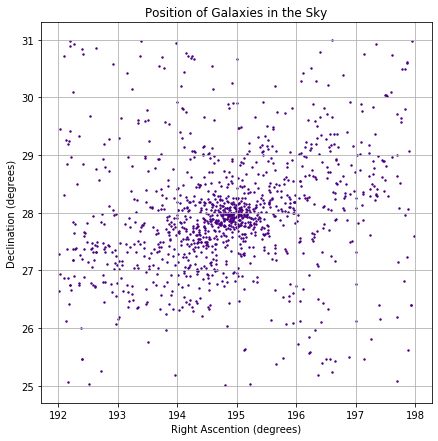

In [8]:
data.RA = data.RA.astype(float)
data.DEC = data.DEC.astype(float)
plt.figure(figsize= (7,7))
plt.scatter(data.RA, data.DEC, color = 'indigo', s=2)
plt.xlabel('Right Ascention (degrees)')
plt.ylabel('Declination (degrees)')
plt.grid()
plt.title('Position of Galaxies in the Sky')

In [9]:
print(data.Redshift)

0       0.02439049
1       0.03071232
2       0.02341527
3       0.02310053
4       0.02362778
           ...    
1180    0.03573755
1181    0.02537541
1182    0.02409993
1183    0.02376505
1184    0.02576452
Name: Redshift, Length: 1185, dtype: object


In [10]:
#Weighted mean of the RA with the R_mag as the weight in degrees

data.R_err = data.R_err.astype(float)
data.R_mag = data.R_mag.astype(float)

def wavg(group, RA ,R_mag):

    d = group[RA]
    w = group[R_mag]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

RA_mean = wavg(data, "RA", "R_mag")
print(RA_mean * u.deg)

194.8357982110001 deg


In [11]:
#Weighted mean of DEC using R_mag as the weight in degrees

def wavg(group, DEC ,R_mag):

    e = group[DEC]
    f = group[R_mag]
    try:
        return (e * f).sum() / f.sum()
    except ZeroDivisionError:
        return e.mean()

DEC_mean = wavg(data, "DEC", "R_mag")
print(DEC_mean * u.deg)

27.968503044492955 deg


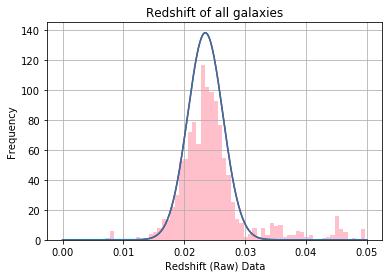

In [12]:
#Plotting the histogram for the Redshifts of all the galaxies as well as a Gaussian curve fit


def Gauss(x,amp,mean,sigma):
    Gauss = amp*np.exp(-(x-mean)**2/(2*sigma**2))
    return Gauss

bins =int((0.05-0.005)/0.00075)

#Plugged data into Logger Pro to find the std and mean since code was giving me errors
std = 0.002882
mean = 0.02345
x = np.linspace(0.00,0.05, 300)
#y = np.arange(0.00,0.05,0.00005)+0.001
y = scipy.stats.norm.pdf(x,mean,std)



#print(data.Redshift)
a = np.asarray(data.Redshift,dtype=float) 



#Histo,bins= np.histogram(data.Redshift,bins)
#Histo,bins= np.histogram(a,bins=binss,range=(0.0,0.05))
#Histo,bins= np.histogram(a,bins,(0.0,0.05))
#Histo,bins= np.histogram(data.Redshift,bins=binss, range=None)

Yay,Nay = curve_fit(Gauss,x,y)

plt.plot(x,y, color = 'red')
plt.hist(a,bins,color='pink',label = 'Data')
plt.xlabel('Redshift (Raw) Data')
plt.ylabel('Frequency')
plt.title('Redshift of all galaxies')
plt.plot(x,Gauss(x,Yay[0],Yay[1],Yay[2]))
plt.grid()


In [13]:
#Distance to Coma cluster using Dopler shift

H_o = 67.9 #* u.km *u.s**-1 *u.Mpc**-1
v = 7017.3 #* u.km * u.s**-1

D = v/H_o

print("The distance to the Coma Cluster is", D)

The distance to the Coma Cluster is 103.34756995581738


In [14]:
#Finding the projected radial distances from each galaxy to the Coma Cluster

RA_proj = data.RA - RA_mean
DEC_proj = data.DEC - DEC_mean

angular_d = np.sqrt((RA_proj*np.cos(data.DEC))**2 + (DEC_proj)**2)
conv_angular = np.radians(angular_d)

Proj_rad = np.tan(conv_angular) * D
print(Proj_rad)

np.mean(Proj_rad) * u.rad

0       3.492638
1       3.534803
2       3.338094
3       3.452251
4       3.324335
          ...   
1180    1.545058
1181    1.457099
1182    1.888082
1183    1.893828
1184    2.057448
Length: 1185, dtype: float64


<Quantity 2.01371837 rad>

In [15]:
#Finding member galaxies

data.Redshift = data.Redshift.astype(float)

Gal_mem = data[Proj_rad < 1.5] #All projected radiuses that are greater than 1.5 Mpc
Red_ = Gal_mem[abs(Gal_mem.Redshift-mean) < 3*std]
print(Red_)


      index               Object          RA        DEC     R_mag  \
18       20  1237665440441892890  194.391192  28.482257  13.26373   
19       21  1237665440441892891  194.383143  28.476943  12.46939   
20       22  1237665440441892904  194.354395  28.495893  16.69903   
21       23  1237665440441892998  194.474743  28.499807  15.10212   
22       24  1237665440441958487  194.562768  28.521783  16.36541   
...     ...                  ...         ...        ...       ...   
1175   1177  1237667323260960965  195.099584  27.286927  17.79181   
1176   1178  1237667323260961158  195.128497  27.300180  17.76642   
1177   1179  1237667323261026354  195.294710  27.246498  15.89053   
1178   1180  1237667323261091954  195.522999  27.297272  15.92124   
1181   1183  1237667323261157453  195.636449  27.295562  15.59799   

     R_Extinction     R_err  Redshift         Z_Err  
18     0.02493722  0.001721  0.020874  7.538812E-06  
19     0.02470157  0.001545  0.022568  9.289376E-06  
20     0.

In [16]:
#Weighted mean of RA for memeber galaxies 
def wavg(group, RA ,R_mag):

    d = group[RA]
    w = group[R_mag]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

RA_mean2 = wavg(Gal_mem, "RA", "R_mag")
print(RA_mean2 * u.deg)


194.81224810449714 deg


In [17]:
#Weighted mean of DEC for member galaxies
def wavg(group, DEC ,R_mag):

    e = group[DEC]
    f = group[R_mag]
    try:
        return (e * f).sum() / f.sum()
    except ZeroDivisionError:
        return e.mean()

DEC_mean2 = wavg(Gal_mem, "DEC", "R_mag")
print(DEC_mean2 * u.deg)

27.889903040620172 deg


In [18]:

#print(Gal_mem_red.Redshift.to_string())

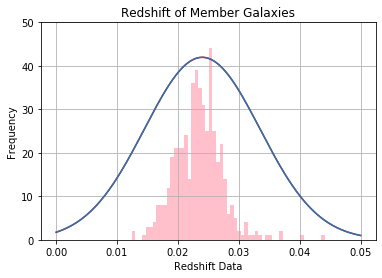

In [19]:
#Iteration 1 of the member galaxies

def Gauss(x,amp,mean,sigma):
    Gauss = amp*np.exp(-(x-mean)**2/(2*sigma**2))
    return Gauss

std = 0.009507
mean = 0.02399
x = np.linspace(0.00,0.05, 300)
#y = np.arange(0.00,0.05,0.00005)+0.001
y = scipy.stats.norm.pdf(x,mean,std)
a = np.asarray(Gal_mem.Redshift,dtype=float)
bins =int((0.5-0.005)/0.009+0.008)

Yay,Nay = curve_fit(Gauss,x,y)

plt.plot(x,y, color = 'red')
plt.hist(a,bins,color='pink',label = 'Data')

axes = plt.gca()
axes.set_ylim([0,50])

plt.xlabel('Redshift Data')
plt.ylabel('Frequency')
plt.title('Redshift of Member Galaxies')
plt.plot(x,Gauss(x,Yay[0],Yay[1],Yay[2]))
plt.grid()

In [20]:
#Distance to Coma cluster using Dopler shift

H_o = 67.9 * u.km *u.s**-1 *u.Mpc**-1
v = 7012.3 * u.km * u.s**-1

D_2 = v/H_o

print("The distance to the Coma Cluster is", D_2)

The distance to the Coma Cluster is 103.27393225331369 Mpc


In [21]:
#Weighted mean of RA for memeber galaxies (It1)
def wavg(group, RA ,R_mag):

    d = group[RA]
    w = group[R_mag]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

RA = wavg(Gal_mem, "RA", "R_mag")
print(RA * u.deg)

#Weighted mean of DEC for member galaxies
def wavg(group, DEC ,R_mag):

    e = group[DEC]
    f = group[R_mag]
    try:
        return (e * f).sum() / f.sum()
    except ZeroDivisionError:
        return e.mean()

DEC_mean2 = wavg(Gal_mem, "DEC", "R_mag")
print(DEC_mean2 * u.deg)

194.81224810449714 deg
27.889903040620172 deg


In [22]:
#Finding the projected radial distances for member galaxies to the Coma Cluster (Iteration 1)

RA_proj2 = Gal_mem.RA - RA_mean2
DEC_proj2 = Gal_mem.DEC - DEC_mean2
correction = np.cos(Gal_mem.DEC)
angular_d = np.sqrt(((RA_proj2*correction)**2) + (DEC_proj2)**2)
conv_angular = np.radians(angular_d)

Proj_rad2 = np.tan(conv_angular* u.rad) * D_2
print(Proj_rad2)

np.mean(Proj_rad2 * u.rad)

18      1.300620
19      1.301461
20      1.357004
21      1.249107
22      1.219595
          ...   
1175    1.123713
1176    1.110205
1177    1.243774
1178    1.286438
1181    1.354673
Length: 495, dtype: float64


<Quantity 0.7527011 Mpc rad>

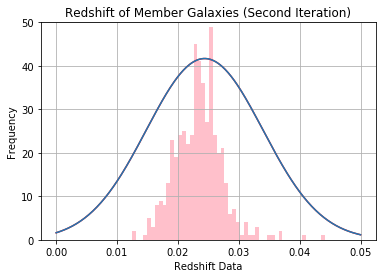

In [23]:
def Gauss(x,amp,mean,sigma):
    Gauss = amp*np.exp(-(x-mean)**2/(2*sigma**2))
    return Gauss

std = 0.009571
mean = 0.02439
x = np.linspace(0.00,0.05, 300)
#y = np.arange(0.00,0.05,0.00005)+0.001
y = scipy.stats.norm.pdf(x,mean,std)
a = np.asarray(Gal_mem.Redshift,dtype=float)
bins =int((0.05-0.005)/0.0009)

Yay,Nay = curve_fit(Gauss,x,y)

plt.plot(x,y, color = 'red')
plt.hist(a,bins,color='pink',label = 'Data')

axes = plt.gca()
axes.set_ylim([0,50])

plt.xlabel('Redshift Data')
plt.ylabel('Frequency')
plt.title('Redshift of Member Galaxies (Second Iteration)')
plt.plot(x,Gauss(x,Yay[0],Yay[1],Yay[2]))
plt.grid()

In [24]:
#Distance 3 to Coma cluster using Dopler shift

H_o = 67.9 #* u.km *u.s**-1 *u.Mpc**-1
v = 7002.8 #* u.km * u.s**-1

D_3 = v/H_o

print("The distance to the Coma Cluster is", D_3)

The distance to the Coma Cluster is 103.13402061855669


In [25]:
#Weighted mean of RA for memeber galaxies
def wavg(group, RA_mean2 ,R_mag):

    d = group[RA_mean2]
    w = group[R_mag]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

RA_mean3 = wavg(Gal_mem, "RA", "R_mag")
print(RA_mean3 * u.deg)

#Weighted mean of DEC for member galaxies
def wavg(group, DEC ,R_mag):

    e = group[DEC]
    f = group[R_mag]
    try:
        return (e * f).sum() / f.sum()
    except ZeroDivisionError:
        return e.mean()

DEC_mean3 = wavg(Gal_mem, "DEC", "R_mag")
print(DEC_mean3 * u.deg)

194.81224810449714 deg
27.889903040620172 deg


In [26]:
#Finding the projected radial distances for member galaxies to the Coma Cluster (Iteration 2)

RA_proj3 = Gal_mem.RA - RA_mean3
DEC_proj3 = Gal_mem.DEC - DEC_mean3

angular_d = np.sqrt((RA_proj2*correction)**2 + (np.cos(DEC_proj2)**2))
conv_angular = np.radians(angular_d)

Proj_rad3 = np.tan(conv_angular) * D_3
print(Proj_rad3)

np.mean(Proj_rad3) *u.Mpc



18      1.667498
19      1.678979
20      1.684008
21      1.590000
22      1.516439
          ...   
1175    1.509831
1176    1.529916
1177    1.508517
1178    1.655915
1181    1.705901
Length: 495, dtype: float64


<Quantity 1.82665196 Mpc>

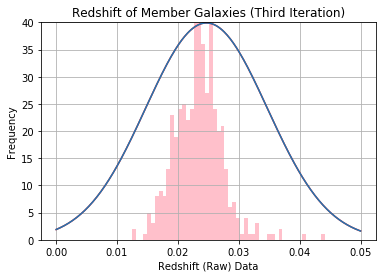

In [27]:
def Gauss(x,amp,mean,sigma):
    Gauss = amp*np.exp(-(x-mean)**2/(2*sigma**2))
    return Gauss

std = 0.009999
mean = 0.02469
x = np.linspace(0.00,0.05, 300)
#y = np.arange(0.00,0.05,0.00005)+0.001
y = scipy.stats.norm.pdf(x,mean,std)
a = np.asarray(Gal_mem.Redshift,dtype=float)
bins =int((0.05-0.005)/0.0009)

Yay,Nay = curve_fit(Gauss,x,y)

plt.plot(x,y, color = 'red')
plt.hist(a,bins,color='pink',label = 'Data')

axes = plt.gca()
axes.set_ylim([0,40])

plt.xlabel('Redshift (Raw) Data')
plt.ylabel('Frequency')
plt.title('Redshift of Member Galaxies (Third Iteration)')
plt.plot(x,Gauss(x,Yay[0],Yay[1],Yay[2]))
plt.grid()

In [28]:
#Distance to Coma cluster using Dopler shift (It3)

H_o = 67.9 #u.km *u.s**-1 *u.Mpc**-1
v_4 = 7000.9  #.km * u.s**-1

D_4 = v_4/H_o

print("The distance to the Coma Cluster is", D_4 * u.Mpc)


The distance to the Coma Cluster is 103.10603829160529 Mpc


In [29]:
#Weighted mean of RA for member galaxies (It3)
def wavg(group, RA ,R_mag):

    d = group[RA]
    w = group[R_mag]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

RA_mean4 = wavg(Gal_mem, "RA", "R_mag")
print(RA_mean4 * u.deg)

#Weighted mean of DEC for member galaxies
def wavg(group, DEC ,R_mag):

    e = group[DEC]
    f = group[R_mag]
    try:
        return (e * f).sum() / f.sum()
    except ZeroDivisionError:
        return e.mean()

DEC_mean4 = wavg(Gal_mem, "DEC", "R_mag")
print(DEC_mean4 * u.deg)

194.81224810449714 deg
27.889903040620172 deg


In [30]:
#Finding the projected radial distances for member galaxies to the Coma Cluster (Iteration 3)

RA_proj4 = Gal_mem.RA - RA_mean4
DEC_proj4 = Gal_mem.DEC - DEC_mean4

angular_d = np.sqrt((RA_proj3*correction)**2 + (np.cos(DEC_proj3)**2))
conv_angular = np.radians(angular_d)

Proj_rad4 = np.tan(conv_angular) * D_4
print(Proj_rad4)

np.mean(Proj_rad4 * u.Mpc)

18      1.667045
19      1.678524
20      1.683551
21      1.589568
22      1.516027
          ...   
1175    1.509421
1176    1.529501
1177    1.508108
1178    1.655466
1181    1.705438
Length: 495, dtype: float64


<Quantity 1.82615635 Mpc>

Text(0.5, 1.0, 'Position of Raw and Member Galaxies in the Sky')

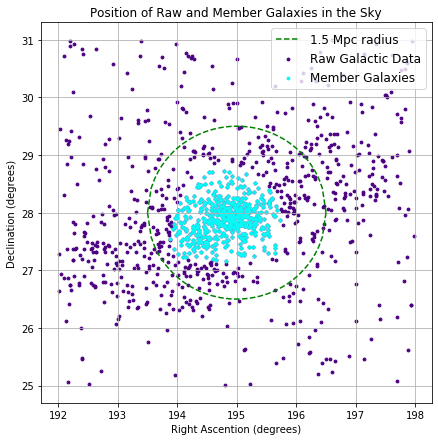

In [31]:
#All galaxies with member galaxies plotted on top. Dashed line signifies 1.5 Mpc radius that was chosen for the galaxies


plt.figure(figsize= (7,7))
plt.scatter(data.RA, data.DEC, color = 'indigo', s=8, label = 'Raw Galactic Data')
plt.scatter(Gal_mem.RA,Gal_mem.DEC, color = '#09F9F6',  s=8, label = 'Member Galaxies')

center = (195,28)
radius = 1.5

x_circ = np.linspace(center[0]-radius,center[0]+radius)
ytop_circ = np.sqrt(radius**2 - (x_circ-center[0])**2) + center[1]
ybottom_circ = -np.sqrt(radius**2 - (x_circ-center[0])**2) + center[1]
plt.plot(x_circ,ytop_circ,'g--', label = '1.5 Mpc radius')
plt.plot(x_circ,ybottom_circ,'g--')




plt.xlabel('Right Ascention (degrees)')
plt.ylabel('Declination (degrees)')
plt.legend(loc = 'upper right',prop={"size":12})
plt.grid()
plt.title('Position of Raw and Member Galaxies in the Sky')





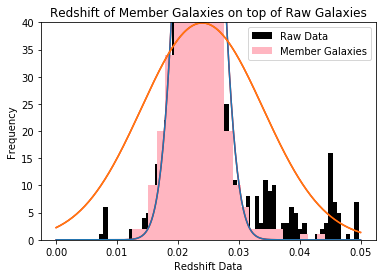

In [32]:
#Raw Redshift histogram with Member Galaxies' Redshifts plotted overtop as well as their Gaussians 

def Gauss(x,amp,mean,sigma):
    Gauss = amp*np.exp(-(x-mean)**2/(2*sigma**2))
    return Gauss

bins =int((0.05-0.005)/0.00075)

std = 0.002882
mean = 0.02345
x = np.linspace(0.00,0.05, 300)
#y = np.arange(0.00,0.05,0.00005)+0.001
y = scipy.stats.norm.pdf(x,mean,std)



#print(data.Redshift)
a = np.asarray(data.Redshift,dtype=float) 




Yay,Nay = curve_fit(Gauss,x,y)

plt.plot(x,y, color = 'red')
plt.hist(a,bins,color='Black',label = 'Raw Data')
plt.xlabel('Redshift (Raw) Data')
plt.ylabel('Frequency')
plt.title('Redshift of all galaxies')
plt.plot(x,Gauss(x,Yay[0],Yay[1],Yay[2]))
plt.grid()



std2 = 0.009999
mean2 = 0.02399
x = np.linspace(0.00,0.05, 300)
#y = np.arange(0.00,0.05,0.00005)+0.001
y = scipy.stats.norm.pdf(x,mean2,std2)
a = np.asarray(Gal_mem.Redshift,dtype=float)
bins =int((0.05-0.005)/0.0019)

Yay,Nay = curve_fit(Gauss,x,y)

plt.plot(x,y, color = 'red')
plt.hist(a,bins,color='LightPink',label = 'Member Galaxies')

axes = plt.gca()
axes.set_ylim([0,40])

plt.xlabel('Redshift Data')
plt.ylabel('Frequency')
plt.title('Redshift of Member Galaxies on top of Raw Galaxies')
plt.legend()
plt.plot(x,Gauss(x,Yay[0],Yay[1],Yay[2]))
plt.grid()



In [33]:
print(Gal_mem)

      index               Object          RA        DEC     R_mag  \
18       20  1237665440441892890  194.391192  28.482257  13.26373   
19       21  1237665440441892891  194.383143  28.476943  12.46939   
20       22  1237665440441892904  194.354395  28.495893  16.69903   
21       23  1237665440441892998  194.474743  28.499807  15.10212   
22       24  1237665440441958487  194.562768  28.521783  16.36541   
...     ...                  ...         ...        ...       ...   
1175   1177  1237667323260960965  195.099584  27.286927  17.79181   
1176   1178  1237667323260961158  195.128497  27.300180  17.76642   
1177   1179  1237667323261026354  195.294710  27.246498  15.89053   
1178   1180  1237667323261091954  195.522999  27.297272  15.92124   
1181   1183  1237667323261157453  195.636449  27.295562  15.59799   

     R_Extinction     R_err  Redshift         Z_Err  
18     0.02493722  0.001721  0.020874  7.538812E-06  
19     0.02470157  0.001545  0.022568  9.289376E-06  
20     0.

In [36]:
#Finding Absolute R-band magnitudes


m = Gal_mem.R_mag
Gal_mem.R_mag = Gal_mem.R_mag.astype(float)
A = Gal_mem.R_Extinction
Gal_mem.R_Extinction = Gal_mem.R_Extinction.astype(float)
v = Proj_rad4
#Gal_mem.Proj_rad2 = Gal_mem.Proj_rad2.astype(float)
#D = D_4, I just copy and pasted the distance in since the log would not apply when units were added to the number

M = m - 5*np.log10(103.106*1e6) + 5 - A*v

Gal_mem['Mr'] = M
#print(Gal_mem.Mr.to_string())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
#Creating Absolute Magnitude column
Gal_mem['Mr'] = M
print(Gal_mem.Mr)

18     -21.844261
19     -22.638492
20     -18.409881
21     -20.003977
22     -18.737820
          ...    
1175   -17.308000
1176   -17.333439
1177   -19.203985
1178   -19.180674
1181   -19.502261
Name: Mr, Length: 495, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
#Calculating Luminosity
M_r = 4.76
Distance = 103.10603829160529

L = 10**((Gal_mem.Mr-(M_r))/(-2.5))
print(L)


18      4.382324e+10
19      9.107449e+10
20      1.853328e+09
21      8.046199e+09
22      2.506847e+09
            ...     
1175    6.717384e+08
1176    6.876626e+08
1177    3.851181e+09
1178    3.769377e+09
1181    5.068792e+09
Name: Mr, Length: 495, dtype: float64


In [39]:
#Creating Luminosity column

Gal_mem["Luminosity"] = L
#print(Gal_mem.Luminosity.to_string())

Lum_Tot = np.sum(Gal_mem['Luminosity']) 
print("The total luminosity of the cluster is:")
print(format(Lum_Tot * u.W, "10.2E"))

#print(Gal_mem.Luminosity)

The total luminosity of the cluster is:
  4.07E+12 W


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
#Radius from centre of cluster


radius = D_4*np.pi/180*np.sqrt((Gal_mem.RA-RA_mean2)**2+(Gal_mem.DEC-DEC_mean2)**2)
print(radius)


18      1.307824
19      1.308535
20      1.366766
21      1.254386
22      1.222511
          ...   
1175    1.201983
1176    1.204196
1177    1.447191
1178    1.665307
1181    1.828591
Length: 495, dtype: float64


In [42]:
#Sorting the radius

Gal_mem['Radius'] = radius
#Gal_mem.Radius = Gal_mem.Radius[:-3]
#print(Gal_mem.Radius.to_string())
#Gal_mem.Radius = Gal_mem.Radius.astype(float)
#Gal_mem.Radius = Gal_mem.Radius.sort_values


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
radii = np.asarray(Gal_mem.Radius,dtype=float)
lumin = np.asarray(Gal_mem.Luminosity,dtype=float)
C_Lum = []

for i,j in zip(radii,lumin):
    if i <= 1.5:
        C_Lum.append(j)
Gal_mem['C_Lum'] = C_Lum       

Gal_mem.C_Lum = Gal_mem.C_Lum.astype(int)

Gal_mem['radii'] = radii

#print(Gal_mem.radii.to_string())

#print(C_Lum)



#print(Norm)

In [393]:
Rad = []

for r,u in zip(radii,lumin):
    if r <= 1.5:
        Rad.append(r)
        

Rad.sort()


495


In [237]:
#Calculating half radius from R_e

R_e = 0.78

r_half = (4*R_e)/3 
print(r_half * u.km)

1.04 km


In [267]:
#Calculating Line of Sight Velocities

Gal_mem.Redshift = Gal_mem.Redshift.astype(float)
Gal_mem.Z_Err = Gal_mem.Z_Err.astype(float)

def wavg(group, Redshift ,R_mag):

    e = group[Redshift]
    f = group[R_mag]
    try:
        return (e * f).sum() / f.sum()
    except ZeroDivisionError:
        return e.mean()

Redshift_mean = wavg(Gal_mem, "Redshift", "R_mag")
print(Redshift_mean)




Loc = Gal_mem.Redshift - Redshift_mean
print(Loc)

0.023431237110503326
18     -0.002557
19     -0.000864
20      0.000517
21      0.000929
22     -0.000393
          ...   
1175    0.000810
1176    0.002210
1177   -0.002818
1178    0.000848
1181    0.001944
Name: Redshift, Length: 495, dtype: float64


In [416]:
#Calculating peculiar velocities

v_p = v_4-Loc
print(v_p )
#print(v_p.to_string())

18      7000.902557
19      7000.900864
20      7000.899483
21      7000.899071
22      7000.900393
           ...     
1175    7000.899190
1176    7000.897790
1177    7000.902818
1178    7000.899152
1181    7000.898056
Name: Redshift, Length: 495, dtype: float64


In [293]:
#Calculating half Mass ratio
sigma = std3*10e13 * u.km * u.s**-1


#std3 = 1000*10e3 * u.m * u.s**-1
G = 6.67*10**-14 *u.km**3 *u.kg**-1 *u.s**-2

M_2 = (3*sigma**2*(r_half*10e-3 *u.km)/G)

print(M_2)

#Finding the mass in terms of solar masses

M_Solar_mass = 1.989*10e30 * u.kg

Mass = M_2/M_Solar_mass

print('The mass of the Coma cluster is',format(Mass * u.kg,"10.2E"),"in solar masses")

2.031419370314843e+45 kg
The mass of the Coma cluster is   1.02E+14 kg in solar masses


In [294]:
#Mass to Light Ratio

Lum = 2.89*10e10 #In solar luminosities 
Ratio = Mass/Lum
print('The Mass to Luminosity Ratio of the Coma Cluster is:',Ratio)

The Mass to Luminosity Ratio of the Coma Cluster is: 353.400340334616
